In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Set the default figure size for matplotlib
plt.rcParams['figure.figsize'] = [12, 6]

# set the color scheme black background with white grid lines
color_scheme = 'dark_background'
plt.style.use(color_scheme)

# set the seaborn style
sns.set(style='ticks', palette='pastel')
# sns.set(style='whitegrid', palette='pastel')

# plot color scheme as black and red
colors = ['black', 'red']

In [4]:
# setting the option of displaying all the columns
pd.set_option('display.max_columns', 50)

In [5]:
# Read the data
delhivery_data = pd.read_csv(r'../data/delhivery_data.csv')

In [6]:
dd = delhivery_data.copy()
dd.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [7]:
print("Shape of the data: ", dd.shape)
print("The Given Dataset has {} rows and {} columns".format(dd.shape[0], dd.shape[1]))
print("Columns: ", dd.columns.to_list())

Shape of the data:  (144867, 24)
The Given Dataset has 144867 rows and 24 columns
Columns:  ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']


In [8]:
# Drop the columns which are not required
unknown_fields = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
dd = dd.drop(columns = unknown_fields)

In [9]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  actual_distance_

In [10]:
# Datatype conversion for the columns
dd['trip_creation_time'] = pd.to_datetime(dd['trip_creation_time'])
dd['od_start_time'] = pd.to_datetime(dd['od_start_time']) 
dd['od_end_time'] = pd.to_datetime(dd['od_end_time'])

cat_cols = dd.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    dd[col] = dd[col].astype('category')

float_cols = dd.select_dtypes(include=['float64']).columns
for col in float_cols:
    dd[col] = dd[col].astype('float16')

dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  category      
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  category      
 5   source_center                   144867 non-null  category      
 6   source_name                     144574 non-null  category      
 7   destination_center              144867 non-null  category      
 8   destination_name                144606 non-null  category      
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [11]:
# Missing values and their percentage
missing_values = dd.isnull().sum().reset_index(name='missing_values')
missing_values['percentage_%'] = (missing_values['missing_values']/dd.shape[0])*100
missing_values = missing_values.sort_values(by='missing_values', ascending=False)
missing_values = missing_values[missing_values['missing_values'] > 0]
missing_values

,index,missing_values,percentage_%
6,source_name,293,0.202254
8,destination_name,261,0.180165


In [12]:
dd[dd['source_name'].isnull()].head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
112,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,22.78125,48.0,34.0,37.78125,48.0,34.0,37.781250
113,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,46.06250,98.0,41.0,56.34375,49.0,33.0,34.156250
114,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,67.68750,127.0,58.0,80.50000,29.0,17.0,24.125000
115,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,88.12500,156.0,73.0,101.25000,28.0,14.0,20.781250
116,training,2018-09-25 08:53:04.377810,thanos::sroute:4460a38d-ab9b-484e-bd4e-f4201d0...,FTL,trip-153786558437756691,IND342902A1B,NaN,IND302014AAA,Jaipur_Hub (Rajasthan),2018-09-26 06:58:08.054001,2018-09-26 15:54:14.280942,536.0,112.68750,212.0,92.0,128.00000,55.0,18.0,26.734375


In [13]:
# dd[(dd['source_name'].isnull()) & ~(dd['source_center'].isnull())]
missing_source_name = dd[dd['source_name'].isnull()]['source_center'].unique().tolist()
dd[(dd['source_center'].isin(missing_source_name)) & ~(dd['source_name'].isnull())]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


In [14]:
missing_destination_name = dd[dd['destination_name'].isnull()]['destination_center'].unique().tolist()
dd[(dd['destination_center'].isin(missing_destination_name)) & ~(dd['destination_name'].isnull())]

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance


In [15]:
missing_trip_data = dd[(dd['source_name'].isnull()) | (dd['destination_name'].isnull())]['trip_uuid'].unique().tolist()
missing_trip_data

['trip-153786558437756691',
 'trip-153842737815495661',
 'trip-153834519721733970',
 'trip-153846056503320607',
 'trip-153852612674280168',
 'trip-153777348608709328',
 'trip-153785822252799564',
 'trip-153835867702133730',
 'trip-153814162355684121',
 'trip-153843937115921268',
 'trip-153851526862672465',
 'trip-153783153973255752',
 'trip-153786712501643905',
 'trip-153818374470352843',
 'trip-153818244828109704',
 'trip-153777969957700771',
 'trip-153802263936969812',
 'trip-153809562727071982',
 'trip-153843581310735103',
 'trip-153807815853537852',
 'trip-153781800694579835',
 'trip-153812396555262982',
 'trip-153799300352000726',
 'trip-153800882473542201',
 'trip-153781894334349262',
 'trip-153833330949418536',
 'trip-153816699243973025',
 'trip-153839170985986650',
 'trip-153836697913613926',
 'trip-153769166516379642',
 'trip-153790940055513598',
 'trip-153848209011525961',
 'trip-153829753238591840',
 'trip-153860002475779846',
 'trip-153800764795617351',
 'trip-1538545269362

In [16]:
len(missing_trip_data), dd['trip_uuid'].nunique(), len(missing_trip_data)/dd['trip_uuid'].nunique()

(110, 14817, 0.007423904974016332)

In [17]:
dd = dd[~dd['trip_uuid'].isin(missing_trip_data)]

In [18]:
dd.duplicated().sum()

0

In [19]:
dd.describe().T

,count,mean,min,25%,50%,75%,max,std
trip_creation_time,143713,2018-09-22 12:34:01.122491904,2018-09-12 00:00:16.535741,2018-09-17 02:33:32.314778112,2018-09-22 02:54:50.852296960,2018-09-27 17:28:45.461110016,2018-10-03 23:59:42.701692,NaN
od_start_time,143713,2018-09-22 17:01:31.270683136,2018-09-12 00:00:16.535741,2018-09-17 07:00:42.244400896,2018-09-22 06:36:29.552777984,2018-09-27 21:14:43.582704896,2018-10-06 04:27:23.392375,NaN
od_end_time,143713,2018-09-23 09:08:33.888178176,2018-09-12 00:50:10.814399,2018-09-18 01:02:03.127152896,2018-09-23 02:26:43.998577920,2018-09-28 12:11:21.606330880,2018-10-08 03:00:24.353479,NaN
start_scan_to_end_scan,143713.0,NaN,20.0,161.0,454.0,1660.0,7896.0,NaN
actual_distance_to_destination,143713.0,NaN,9.0,23.359375,66.1875,287.25,1927.0,NaN
actual_time,143713.0,NaN,9.0,52.0,132.0,519.0,4532.0,NaN
osrm_time,143713.0,NaN,6.0,27.0,65.0,262.0,1686.0,NaN
osrm_distance,143713.0,NaN,9.007812,29.921875,78.875,348.5,2326.0,NaN
segment_actual_time,143713.0,NaN,-244.0,20.0,28.0,40.0,3052.0,NaN
segment_osrm_time,143713.0,NaN,0.0,11.0,17.0,22.0,1611.0,NaN


In [20]:
dd.describe(include='category').T

,count,unique,top,freq
data,143713,2,training,104358
route_schedule_uuid,143713,1485,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,1812
route_type,143713,2,FTL,98533
trip_uuid,143713,14707,trip-153846035308581166,101
source_center,143713,1494,IND000000ACB,23267
source_name,143713,1494,Gurgaon_Bilaspur_HB (Haryana),23267
destination_center,143713,1465,IND000000ACB,15180
destination_name,143713,1465,Gurgaon_Bilaspur_HB (Haryana),15180


In [21]:
dd['unique_trip'] = dd['trip_uuid'].str.cat([dd['source_center'], dd['destination_center']], sep="_")
dd['unique_trip'].head()

0    trip-153741093647649320_IND388121AAA_IND388620AAB
1    trip-153741093647649320_IND388121AAA_IND388620AAB
2    trip-153741093647649320_IND388121AAA_IND388620AAB
3    trip-153741093647649320_IND388121AAA_IND388620AAB
4    trip-153741093647649320_IND388121AAA_IND388620AAB
Name: unique_trip, dtype: object

In [65]:
agg_dict = {
    'data':'first',
    'trip_creation_time': 'first',
    'route_type': 'first',
    'source_name': 'first',
    'destination_name': 'first',
    'od_start_time': 'first',
    'od_end_time': 'first',
    'start_scan_to_end_scan': 'first',
    'actual_distance_to_destination': 'last',
    'actual_time': 'last',
    'osrm_time': 'last',
    'osrm_distance': 'last',
    'segment_actual_time': 'sum',
    'segment_osrm_time': 'sum',
    'segment_osrm_distance': 'sum',
}

dd_grouped = dd.groupby(by="unique_trip", as_index=False).agg(agg_dict)

In [66]:
dd_grouped.head()

,unique_trip,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.750000,732.0,329.0,446.500000,728.0,534.0,670.593750
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,441.000000,830.0,388.0,545.000000,820.0,474.0,649.859375
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.640625,47.0,26.0,28.203125,46.0,26.0,28.203125
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.531250,96.0,42.0,56.906250,95.0,39.0,55.986328
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.500000,611.0,212.0,281.250000,608.0,231.0,317.718750


In [67]:
dd_grouped.shape

(26037, 16)

In [68]:
dd_grouped['source_name']

0        Kanpur_Central_H_6 (Uttar Pradesh)
1        Bhopal_Trnsport_H (Madhya Pradesh)
2         Doddablpur_ChikaDPP_D (Karnataka)
3             Tumkur_Veersagr_I (Karnataka)
4             Gurgaon_Bilaspur_HB (Haryana)
                        ...                
26032    Tirchchndr_Shnmgprm_D (Tamil Nadu)
26033     Peikulam_SriVnktpm_D (Tamil Nadu)
26034          Eral_Busstand_D (Tamil Nadu)
26035         Sandur_WrdN1DPP_D (Karnataka)
26036                    Hospet (Karnataka)
Name: source_name, Length: 26037, dtype: category
Categories (1498, object): ['AMD_Memnagar (Gujarat)', 'AMD_Rakhial (Gujarat)', 'Abohar_DC (Punjab)', 'Achrol_BgwriDPP_D (Rajasthan)', ..., 'YamunaNagar_DC (Haryana)', 'Yellandu_Sudimala_D (Telangana)', 'Yellareddy_JKRoad_D (Telangana)', 'Zahirabad_Mohim_D (Telangana)']

In [69]:
# dd_grouped['source_name'].str.index('('), dd_grouped['source_name'].str.index(')')
dd_grouped['source_state'] = dd_grouped['source_name'].apply(lambda name: name[name.index('(')+1:name.index(')')])
dd_grouped['source_point'] = dd_grouped['source_name'].apply(lambda name: name[:name.index('(')-1])
dd_grouped['source_city'] = dd_grouped['source_point'].apply(lambda name: name.split('_')[0])
dd_grouped['source_code'] = dd_grouped['source_point'].apply(lambda name: "_".join(name.split('_')[1:]))
dd_grouped[['source_point','source_state','source_city','source_code']].head()

,source_point,source_state,source_city,source_code
0,Kanpur_Central_H_6,Uttar Pradesh,Kanpur,Central_H_6
1,Bhopal_Trnsport_H,Madhya Pradesh,Bhopal,Trnsport_H
2,Doddablpur_ChikaDPP_D,Karnataka,Doddablpur,ChikaDPP_D
3,Tumkur_Veersagr_I,Karnataka,Tumkur,Veersagr_I
4,Gurgaon_Bilaspur_HB,Haryana,Gurgaon,Bilaspur_HB


In [70]:
dd_grouped['destination_state'] = dd_grouped['destination_name'].apply(lambda name: name[name.index('(')+1:name.index(')')])
dd_grouped['destination_point'] = dd_grouped['destination_name'].apply(lambda name: name[:name.index('(')-1])
dd_grouped['destination_city'] = dd_grouped['destination_point'].apply(lambda name: name.split('_')[0])
dd_grouped['destination_code'] = dd_grouped['destination_point'].apply(lambda name: "_".join(name.split('_')[1:]))
dd_grouped[['destination_name','destination_state','destination_city','destination_code']].head()

,destination_name,destination_state,destination_city,destination_code
0,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur_HB
1,Kanpur_Central_H_6 (Uttar Pradesh),Uttar Pradesh,Kanpur,Central_H_6
2,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr_D
3,Doddablpur_ChikaDPP_D (Karnataka),Karnataka,Doddablpur,ChikaDPP_D
4,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Mehmdpur_H


In [80]:
print(city_short_codes)

['Mau', 'Goa', 'Hyd', 'GGN', 'BLR', 'Pen', 'MAA', 'AMD', 'Blr', 'FBD', 'CCU', 'NOI', 'BOM', 'Cjb', 'Una', 'GZB', 'Amb', 'Amd', 'Wai', 'Del']


In [85]:
[k for k,_ in city_code_map.items() if k in [i.upper() for i in city_short_codes]]

['FBD', 'GGN', 'DEL', 'BLR', 'HYD', 'AMD', 'MAA', 'BOM', 'NOI', 'GZB', 'CJB']

In [88]:
source_cities = dd_grouped[dd_grouped['source_city'].str.len() == 3]['source_city'].unique().tolist()
destination_cities = dd_grouped[dd_grouped['destination_city'].str.len() == 3]['destination_city'].unique().tolist()

source_cities.extend(destination_cities)
city_short_codes = list(set(source_cities))
city_short_codes

city_code_map = {
    'FBD': 'Faridabad',
    'GGN': 'Gurgaon',
    'DEL': 'Delhi',
    'BLR': 'Bangalore',
    'HYD': 'Hyderabad',
    'AMD': 'Ahmedabad',
    'MAA': 'Chennai',
    'BOM': 'Mumbai',
    'NOI': 'Noida',
    'GZB': 'Ghaziabad',
    'CJB': 'Coimbatore',
    'BENGALURU': 'Bangalore',
}

def map_city_code(city_code):
    return city_code_map.get(city_code.upper(), city_code)

dd_grouped['source_city'] = dd_grouped['source_city'].apply(map_city_code)
dd_grouped['destination_city'] = dd_grouped['destination_city'].apply(map_city_code)

In [89]:
dd_grouped['is_within_state'] = dd_grouped.apply(lambda row: "Yes" if row['source_state'] == row['destination_state'] else "No", axis=1)
dd_grouped['is_within_state'] = dd_grouped['is_within_state'].astype('category')

In [90]:
dd_grouped['trip_creation_date'] = dd_grouped['trip_creation_time'].dt.date
dd_grouped['trip_creation_day'] = dd_grouped['trip_creation_time'].dt.day
dd_grouped['trip_creation_month'] = dd_grouped['trip_creation_time'].dt.month
dd_grouped['trip_creation_year'] = dd_grouped['trip_creation_time'].dt.year
dd_grouped['trip_creation_hour'] = dd_grouped['trip_creation_time'].dt.hour
dd_grouped['trip_creation_weekday'] = dd_grouped['trip_creation_time'].dt.weekday
dd_grouped['trip_creation_week'] = dd_grouped['trip_creation_time'].dt.isocalendar().week
dd_grouped['trip_creation_quarter'] = dd_grouped['trip_creation_time'].dt.quarter
dd_grouped.head()

,unique_trip,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_point,source_city,source_code,destination_state,destination_point,destination_city,destination_code,is_within_state,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_creation_quarter,trip_duration,trip_time_diff,trip_distance_diff,trip_speed,trip_osrm_speed,trip_speed_diff,routes
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.750000,732.0,329.0,446.500000,728.0,534.0,670.593750,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,No,2018-09-12,12,9,2018,0,2,37,3,0 days 21:00:36.265275,403.0,-62.7500,0.524414,1.357422,-0.833008,Kanpur_Central_H_6 -> Gurgaon_Bilaspur_HB
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,441.000000,830.0,388.0,545.000000,820.0,474.0,649.859375,Madhya Pradesh,Bhopal_Trnsport_H,Bhopal,Trnsport_H,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,No,2018-09-12,12,9,2018,0,2,37,3,0 days 16:39:30.322728,442.0,-104.0000,0.531250,1.404297,-0.873047,Bhopal_Trnsport_H -> Kanpur_Central_H_6
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.640625,47.0,26.0,28.203125,46.0,26.0,28.203125,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Chikblapur,ShntiSgr_D,Yes,2018-09-12,12,9,2018,0,2,37,3,0 days 00:58:49.943264,21.0,-3.5625,0.524414,1.084961,-0.560547,Doddablpur_ChikaDPP_D -> Chikblapur_ShntiSgr_D
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.531250,96.0,42.0,56.906250,95.0,39.0,55.986328,Karnataka,Tumkur_Veersagr_I,Tumkur,Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,Yes,2018-09-12,12,9,2018,0,2,37,3,0 days 02:02:46.769161,54.0,-8.3750,0.505371,1.354492,-0.849121,Tumkur_Veersagr_I -> Doddablpur_ChikaDPP_D
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.500000,611.0,212.0,281.250000,608.0,231.0,317.718750,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,Punjab,Chandigarh_Mehmdpur_H,Chandigarh,Mehmdpur_H,No,2018-09-12,12,9,2018,0,2,37,3,0 days 13:54:38.335721,399.0,-43.7500,0.388672,1.326172,-0.937500,Gurgaon_Bilaspur_HB -> Chandigarh_Mehmdpur_H


In [91]:
dd_grouped['trip_duration'] = dd_grouped['od_end_time'] - dd_grouped['od_start_time']
dd_grouped['trip_time_diff'] = dd_grouped['actual_time'] - dd_grouped['osrm_time']
dd_grouped['trip_distance_diff'] = dd_grouped['actual_distance_to_destination'] - dd_grouped['osrm_distance']
dd_grouped['trip_speed'] = dd_grouped['actual_distance_to_destination'] / dd_grouped['actual_time']
dd_grouped['trip_osrm_speed'] = dd_grouped['osrm_distance'] / dd_grouped['osrm_time']
dd_grouped['trip_speed_diff'] = dd_grouped['trip_speed'] - dd_grouped['trip_osrm_speed']
dd_grouped.head()

,unique_trip,data,trip_creation_time,route_type,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,source_state,source_point,source_city,source_code,destination_state,destination_point,destination_city,destination_code,is_within_state,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour,trip_creation_weekday,trip_creation_week,trip_creation_quarter,trip_duration,trip_time_diff,trip_distance_diff,trip_speed,trip_osrm_speed,trip_speed_diff,routes
0,trip-153671041653548748_IND209304AAA_IND000000ACB,training,2018-09-12 00:00:16.535741,FTL,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.750000,732.0,329.0,446.500000,728.0,534.0,670.593750,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,No,2018-09-12,12,9,2018,0,2,37,3,0 days 21:00:36.265275,403.0,-62.7500,0.524414,1.357422,-0.833008,Kanpur_Central_H_6 -> Gurgaon_Bilaspur_HB
1,trip-153671041653548748_IND462022AAA_IND209304AAA,training,2018-09-12 00:00:16.535741,FTL,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,441.000000,830.0,388.0,545.000000,820.0,474.0,649.859375,Madhya Pradesh,Bhopal_Trnsport_H,Bhopal,Trnsport_H,Uttar Pradesh,Kanpur_Central_H_6,Kanpur,Central_H_6,No,2018-09-12,12,9,2018,0,2,37,3,0 days 16:39:30.322728,442.0,-104.0000,0.531250,1.404297,-0.873047,Bhopal_Trnsport_H -> Kanpur_Central_H_6
2,trip-153671042288605164_IND561203AAB_IND562101AAA,training,2018-09-12 00:00:22.886430,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.640625,47.0,26.0,28.203125,46.0,26.0,28.203125,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,Karnataka,Chikblapur_ShntiSgr_D,Chikblapur,ShntiSgr_D,Yes,2018-09-12,12,9,2018,0,2,37,3,0 days 00:58:49.943264,21.0,-3.5625,0.524414,1.084961,-0.560547,Doddablpur_ChikaDPP_D -> Chikblapur_ShntiSgr_D
3,trip-153671042288605164_IND572101AAA_IND561203AAB,training,2018-09-12 00:00:22.886430,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.531250,96.0,42.0,56.906250,95.0,39.0,55.986328,Karnataka,Tumkur_Veersagr_I,Tumkur,Veersagr_I,Karnataka,Doddablpur_ChikaDPP_D,Doddablpur,ChikaDPP_D,Yes,2018-09-12,12,9,2018,0,2,37,3,0 days 02:02:46.769161,54.0,-8.3750,0.505371,1.354492,-0.849121,Tumkur_Veersagr_I -> Doddablpur_ChikaDPP_D
4,trip-153671043369099517_IND000000ACB_IND160002AAC,training,2018-09-12 00:00:33.691250,FTL,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.500000,611.0,212.0,281.250000,608.0,231.0,317.718750,Haryana,Gurgaon_Bilaspur_HB,Gurgaon,Bilaspur_HB,Punjab,Chandigarh_Mehmdpur_H,Chandigarh,Mehmdpur_H,No,2018-09-12,12,9,2018,0,2,37,3,0 days 13:54:38.335721,399.0,-43.7500,0.388672,1.326172,-0.937500,Gurgaon_Bilaspur_HB -> Chandigarh_Mehmdpur_H


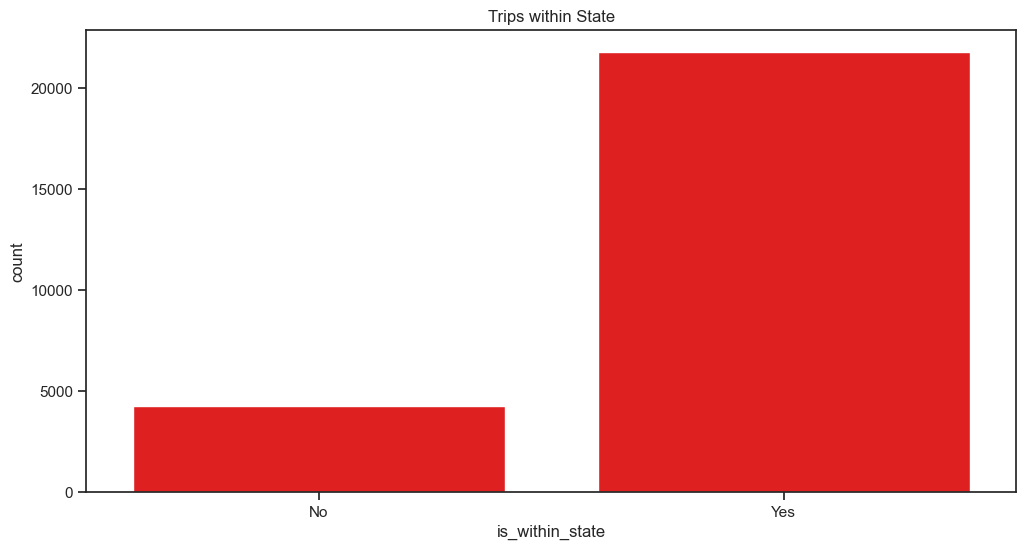

In [92]:
sns.countplot(x='is_within_state', data=dd_grouped, color=colors[1])
plt.title("Trips within State")
plt.show()

In [104]:
frequenct_routes['count'].items()

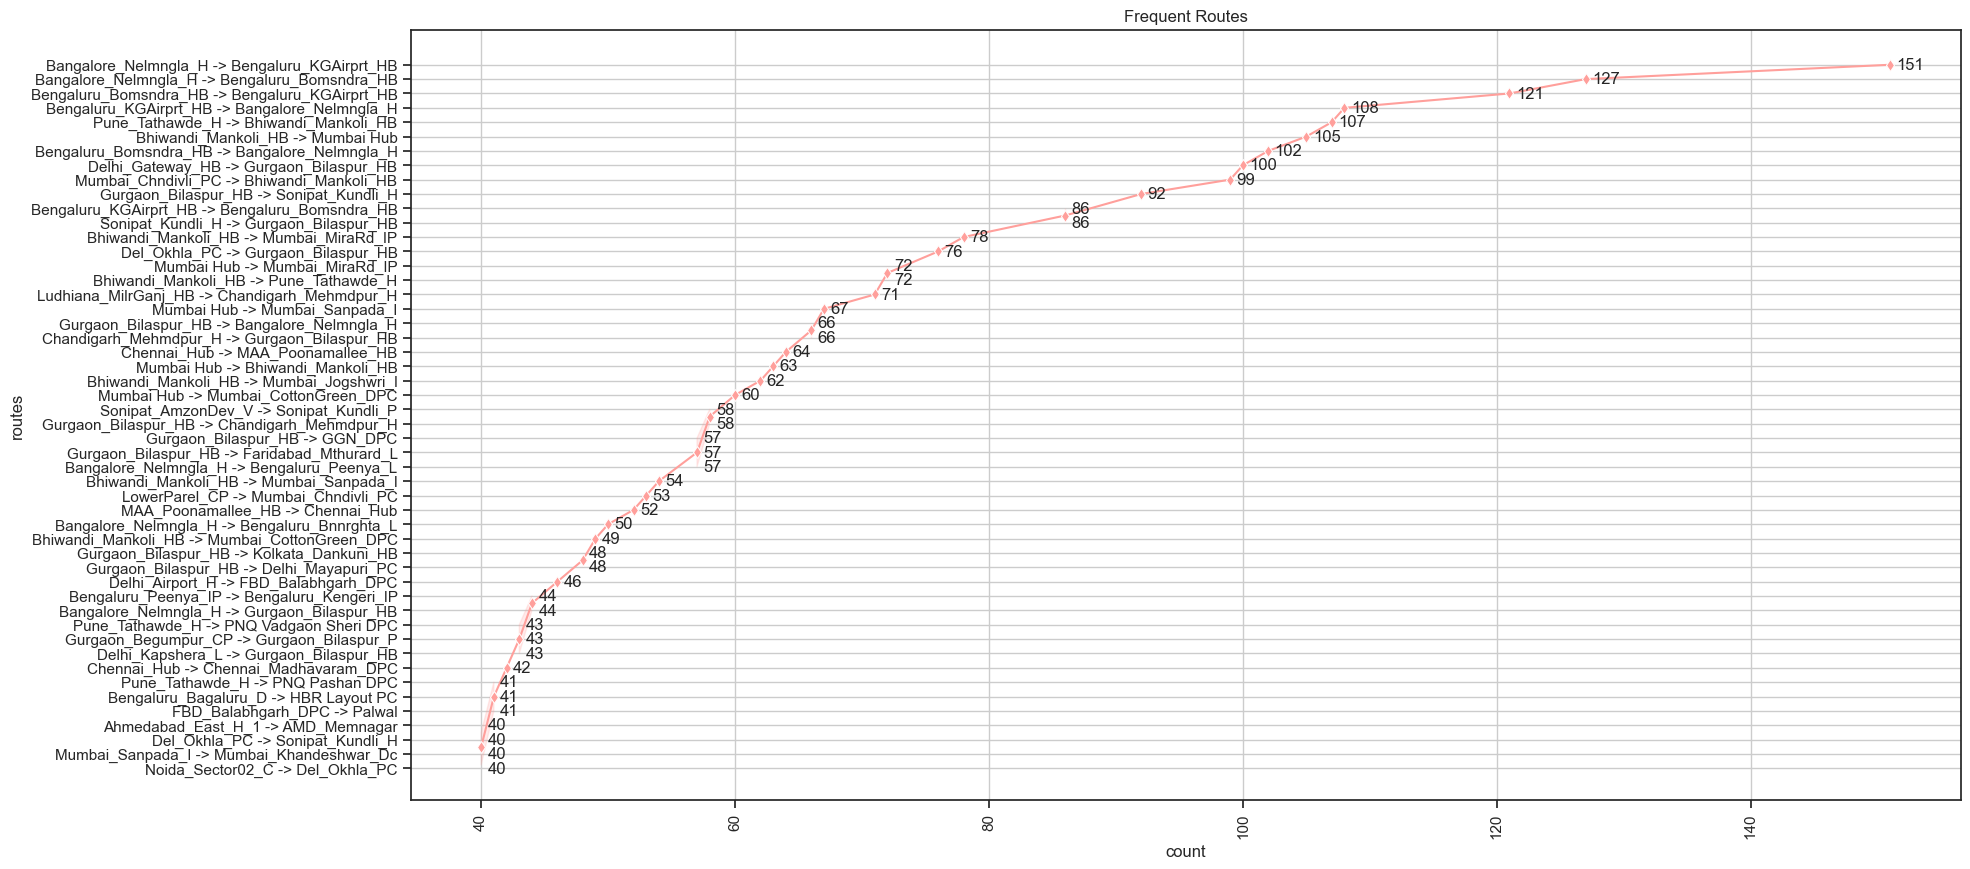

In [111]:
dd_grouped['routes'] = dd_grouped['source_point'].str.cat(dd_grouped['destination_point'], sep=" -> ")
frequenct_routes = dd_grouped['routes'].value_counts().reset_index(name='count').head(50)

# line plot
plt.figure(figsize=(20, 10))
sns.lineplot(y='routes', x='count', data=frequenct_routes, marker='d', color='r')
plt.xticks(rotation=90)
plt.title("Frequent Routes")
plt.grid()

for i, count in frequenct_routes['count'].items():
    plt.text(count+0.5, i, str(count), ha='left', va='center')

plt.show()

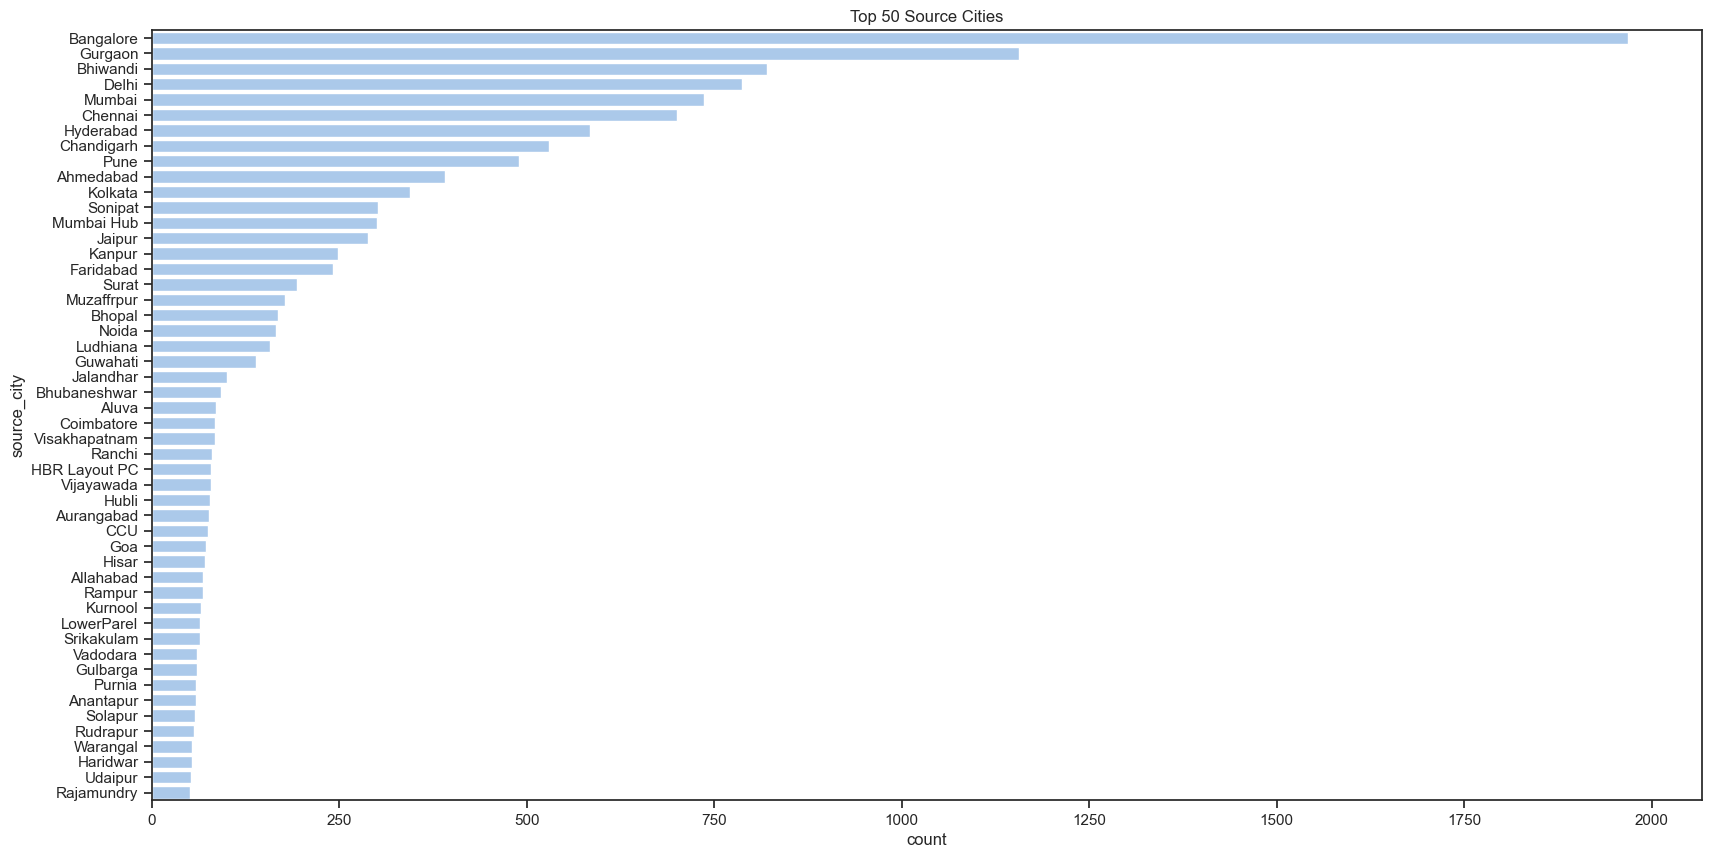

In [94]:
# bar plot for the top 50 source city 
frequenct_source_city = dd_grouped['source_city'].value_counts().reset_index(name='count').head(50)
plt.figure(figsize=(20, 10))
sns.barplot(y='source_city', x='count', data=frequenct_source_city)
plt.title("Top 50 Source Cities")
plt.show()

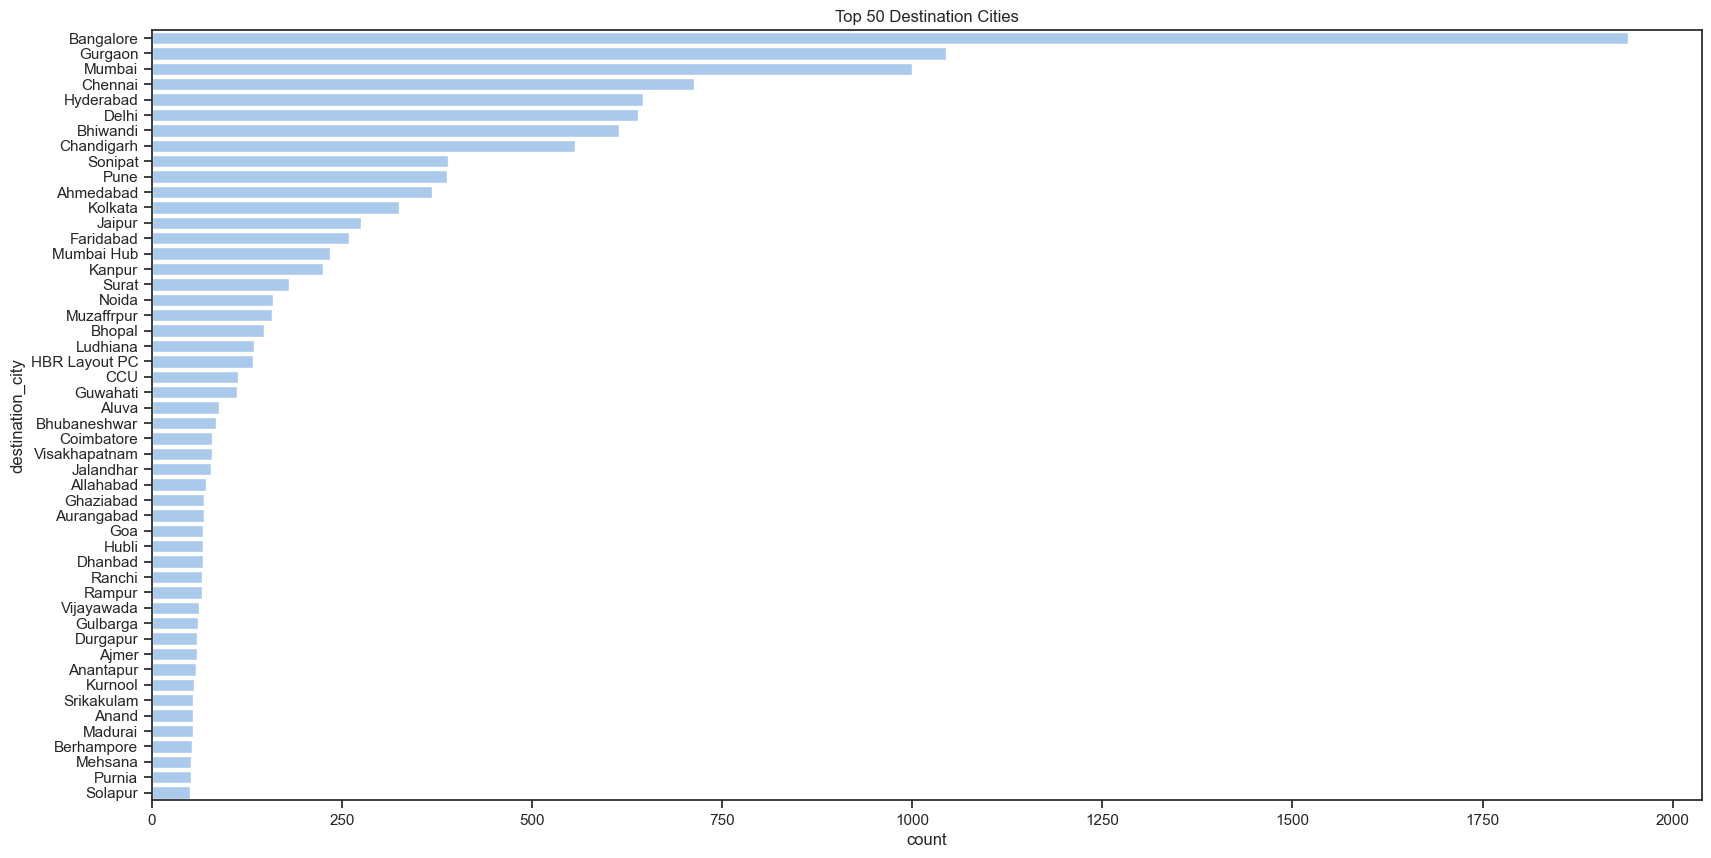

In [95]:
# bar plot for the top 50 source city 
frequenct_destination_city = dd_grouped['destination_city'].value_counts().reset_index(name='count').head(50)
plt.figure(figsize=(20, 10))
sns.barplot(y='destination_city', x='count', data=frequenct_destination_city)
plt.title("Top 50 Destination Cities")
plt.show()

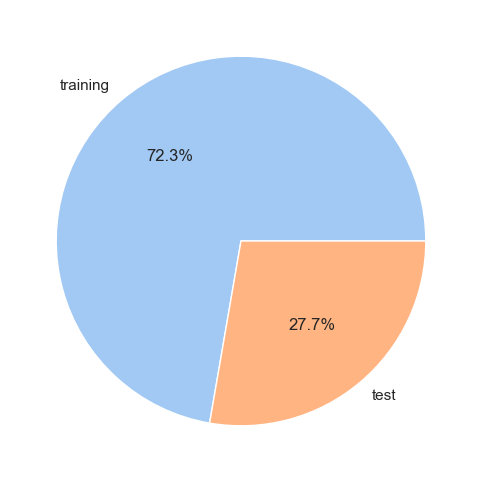

In [54]:
plt.pie(dd_grouped['data'].value_counts(), labels = dd_grouped['data'].value_counts().index, autopct='%1.1f%%')
plt.show()

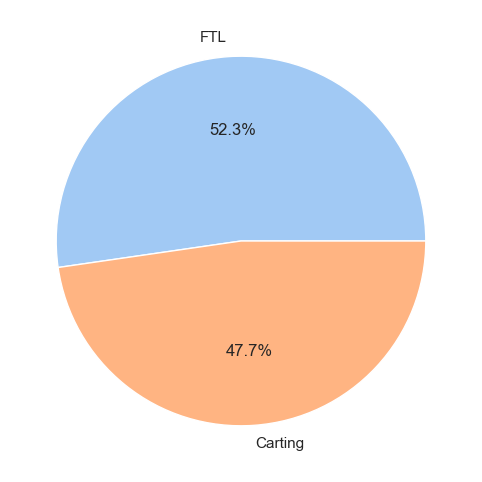

In [37]:
plt.pie(dd_grouped['route_type'].value_counts(), labels = dd_grouped['route_type'].value_counts().index, autopct='%1.1f%%')
plt.show()